In [17]:
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

def divide_non_none_elements(input_list, n):
    return [x / n for x in input_list if x is not None]

def check_contains_all_substrings(string, substrings):
    return all(substring in string for substring in substrings)

def check_contains_any_substrings(string, substrings):
    return any(substring in string for substring in substrings)


In [18]:
## 가우시안 추가
def get_data(directory, e, unit, latent_dim):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        end = d.find('-dec', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if f'lmbda={l}' in file_path and f'units={unit}' in file_path and f'latent_dim={latent_dim}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        try:
                            data_dict[l].append(json.loads(line))
                        except json.JSONDecodeError as err:
                            print(f"JSONDecodeError: {err} in line: {line}")

    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우

    # sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict

dim = 1024
e = 79
unit = '1000'
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian/gaussian_default'

# 요소를 나누기 위한 함수
def divide_non_none_elements(input_list, n):
    return [x / n for x in input_list if x is not None]

# for l_dim in ['400', '500', '600', '800', '1000']:
for l_dim in ['1000']:
    data, lmbdas, data_dict = get_data(directory, e, unit, l_dim)

    # 데이터 전처리
    val_rate = [entry[0] for entry in data]
    val_mse = [entry[1] for entry in data]
    rate = [entry[2] for entry in data]
    mse = [entry[3] for entry in data]

    val_rate = divide_non_none_elements(val_rate, 1)
    val_mse = divide_non_none_elements(val_mse, 1)
    rate = divide_non_none_elements(rate, 1)
    mse = divide_non_none_elements(mse, 1)

plot_data = {}
plot_data['gaussian'] = {'val_mse': val_mse, 'val_rate':val_rate, 'mse': mse, 'rate': rate}

[0.3, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0]


In [19]:
def get_data(directory, e, tags = None):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # lmbda_value = int(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    lmbdas = sorted(lmbdas)
    print(lmbdas)

    data_dict = {}
    for l in lmbdas: 
        data_dict[l] = []
        
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path):
                # if type(tags) == list and check_contains_any_substrings(file_path, tags):
                    with open(file_path, 'r') as f:
                        for line in f:
                            data_dict[l].append(json.loads(line))
    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict

def get_RD_plot_data(directory, e, label):
    data, lmbdas, data_dict = get_data(directory, e)
    
    val_rate = [entry[0] for entry in data]
    val_mse = [entry[1] for entry in data]
    val_rate = divide_non_none_elements(val_rate, 1)
    val_mse = divide_non_none_elements(val_mse, 1)
    rate = [entry[2] for entry in data]
    mse = [entry[3] for entry in data]
    rate = divide_non_none_elements(rate, 1)
    mse = divide_non_none_elements(mse, 1)
    
    return val_mse, val_rate, mse, rate, lmbdas, label


[1.0, 2.0, 4.0, 7.0, 13.0, 24.0, 43.0, 79.0, 146.0, 270.0, 500.0, 3000.0]
[1.0, 2.0, 4.0, 7.0, 13.0, 24.0, 43.0, 79.0, 146.0, 270.0, 500.0, 3000.0]


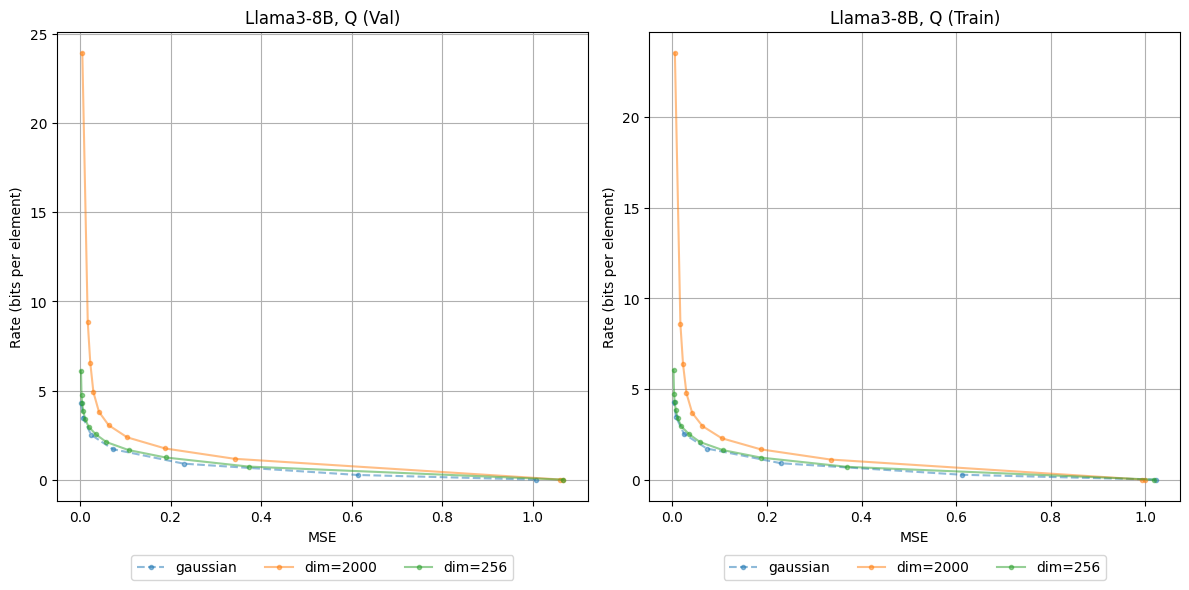

In [20]:
directories = [
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_out-in-lier/attn_d256_zscore4_inlier/llama3-8B_d256_b1024_e150_lr1e-5_normalize', 'attn inlier'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_out-in-lier/attn_d256_zscore4_outlier/llama3-8B_d256_b1024_e150_lr1e-5_normalize', 'attn outler'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_out-in-lier/mlp_d256_zscore4_inlier/llama3-8B_d256_b1024_e150_lr1e-5_normalize', 'mlp inlier'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_out-in-lier/mlp_d256_zscore4_outlier/llama3-8B_d256_b1024_e150_lr1e-5_normalize', 'mlp, outler'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d128_b1024_e150_lr5e-5_normalize', 'mlp'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-0-self_attn-k_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', 'layer0 k'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-20-self_attn-k_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', 'layer20 k'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-0-self_attn-k_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', 'later0 gate'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d128_b1024_e150_lr1e-5_normalize', 'layer0, q'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-19-self_attn-q_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', 'layer19 q'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_mlp_col/llama3-8B_d128_b1024_e150_lr5e-6_normalize', 'MLP Col direction'),
    # ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d128_b1024_e150_lr1e-4_normalize', 'MLP Row direction'),
    ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3-8B_mlp_latent_dim_2000/llama3-8B_d256_b1024_e150_lr1e-5_normalize', 'dim=2000'),
    ('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d256_b1024_e150_lr5e-5_normalize', 'dim=256'),

]
#  f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
# title =  'Llama3-8B, MLP'
# pairs = [(16, '5e-5'),
#          (64, '5e-6'),
#          (128, '1e-4'), 
#          (256, '1e-4'), 
#          (512, '1e-4'), 
#          (1024, '5e-5'),
#          (4096, '1e-5')]

# for dim in [16, 32, 64, 128, 256, 1024]:
#     for lr in ['1e-4', '5e-5', '1e-5', '5e-6']:
#         direct = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_mlp_in/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
#         directories.append((direct, f'size{dim}, lr{lr}'))

# for dim in [16, 32, 64, 128, 256, 1024]:
#     directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d{dim}_b1024_e150_lr1e-4_normalize', f'Out, size{dim}, lr{5e-6}'))
#     directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_mlp_in/llama3-8B_d{dim}_b1024_e150_lr5e-6_normalize', f'In, size{dim}, lr{5e-6}'))
# directories.append(('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d1024_b1024_e150_lr5e-5_normalize_0', 'Out, 1024, 5e-5'))
# for layer_idx in range(31):
    # directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-{layer_idx}-self_attn-k_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', f'layer{layer_idx}, k'))
    # directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-{layer_idx}-self_attn-v_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', f'layer{layer_idx}, v'))
    # directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-{layer_idx}-self_attn-o_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', f'layer{layer_idx}, o'))
    # directories.append((f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor/model-layers-{layer_idx}-self_attn-q_proj-weight/llama3-8B_d16_b1024_e150_lr1e-5_normalize', f'layer{layer_idx}, q'))
 
for directory, label, in directories:
    try:
        val_mse, val_rate, mse, rate, lmbdas, label = get_RD_plot_data(directory=directory, e=149, label=label)
        plot_data[label] = {'val_mse': val_mse, 'val_rate':val_rate, 'mse': mse, 'rate': rate, 'lmbdas': lmbdas}
    except Exception as err:
        print(f"예외 발생: {err}")
        continue
    
plt.figure(figsize=(12, 6))

# Validation subplot    
ax1 = plt.subplot(1, 2, 1)
for l, v in plot_data.items():
    if 'layer0,' in l :
        plt.plot(v['val_mse'], v['val_rate'], marker = 'o',  markersize = 3,linestyle='-', label=l, alpha=1)
    elif l == 'gaussian' :
        plt.plot(v['val_mse'], v['val_rate'], marker = 'o',  markersize = 3,linestyle='--', label=l, alpha=0.5)
    else:
        plt.plot(v['val_mse'], v['val_rate'], marker = 'o',  markersize = 3,linestyle='-', label=l, alpha=0.5)

# plt.plot(plot_data['mlp']['val_mse'], plot_data['mlp']['val_rate'], linestyle='-', label='mlp', alpha=1, color='r')

plt.title('Llama3-8B, Q (Val)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
# plt.xlim(0, 0.1)  # x축 범위 설정
# plt.ylim(0, 8)  # y축 범위 설정
plt.grid(True)
ax1.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)  # 범례를 아래로 이동

# Training subplot
ax2 = plt.subplot(1, 2, 2)
for l, v in plot_data.items():
    if 'layer0,' in l:
        plt.plot(v['mse'], v['rate'],marker = 'o',  markersize = 3, linestyle='-', label=l, alpha=1)
    elif l == 'gaussian' :
        plt.plot(v['mse'], v['rate'],marker = 'o',  markersize = 3, linestyle='--', label=l, alpha=0.5)
    else:
        plt.plot(v['mse'], v['rate'],marker = 'o',  markersize = 3, linestyle='-', label=l, alpha=0.5)

# plt.plot(plot_data['mlp']['val_mse'], plot_data['mlp']['val_rate'], linestyle='-', label='mlp', alpha=1, color='r')

plt.title('Llama3-8B, Q (Train)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
# plt.xlim(0, 0.1)  # x축 범위 설정
# plt.ylim(0, 8)  # y축 범위 설정
plt.grid(True)
ax2.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)  # 범례를 아래로 이동

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()

In [21]:
plot_data


{'gaussian': {'val_mse': [1.00617,
   0.612999,
   0.229314,
   0.0724454,
   0.0243915,
   0.00747115,
   0.00256888],
  'val_rate': [0.00297873,
   0.26358,
   0.897103,
   1.71064,
   2.52118,
   3.45392,
   4.27763],
  'mse': [1.02295,
   0.613249,
   0.229831,
   0.0724612,
   0.0243614,
   0.00744906,
   0.00255458],
  'rate': [0.00292696,
   0.270396,
   0.904946,
   1.71921,
   2.52968,
   3.46234,
   4.28598]},
 'dim=2000': {'val_mse': [1.06732,
   1.06022,
   0.341234,
   0.188454,
   0.104445,
   0.0633333,
   0.0419325,
   0.0297002,
   0.0227813,
   0.0172081,
   0.00523524],
  'val_rate': [0.000125439,
   0.00851573,
   1.17095,
   1.74859,
   2.37237,
   3.05529,
   3.80504,
   4.90769,
   6.55553,
   8.83648,
   23.9374],
  'mse': [1.00075,
   0.994415,
   0.334428,
   0.186578,
   0.104236,
   0.0634931,
   0.0416904,
   0.0296404,
   0.0223542,
   0.0167487,
   0.00506521],
  'rate': [0.000123753,
   0.00794085,
   1.11039,
   1.67474,
   2.28614,
   2.95495,
   3.685

In [22]:
# parent = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_per_tensor'
# dirlist = os.listdir(parent)
# for d in dirlist:
#     # if 'layers-1' in d:
#         if 'layers-13' in d: continue
#         if 'layers-11' in d: continue
#         if 'layers-15' in d: continue
#         directories.append((os.path.join(parent, d, 'llama3-8B_d16_b1024_e150_lr1e-5_normalize'), d))


# for directory, label, in directories:
#     try:
#         val_mse, val_rate, mse, rate, lmbdas, label = get_RD_plot_data(directory=directory, e=149, label=label)
#         plot_data[label] = {'val_mse': val_mse, 'val_rate':val_rate, 'mse': mse, 'rate': rate, 'lmbdas': lmbdas}
#     except Exception as err:
#         print(f"예외 발생: {err}")
#         continue

# plt.figure(figsize=(12, 6))

# # Validation subplot    
# ax1 = plt.subplot(1, 2, 1)
# for l, v in plot_data.items():
#     plt.plot(v['val_mse'], v['val_rate'], linestyle='-', label=l, alpha=0.7)

# plt.plot(plot_data['mlp']['val_mse'], plot_data['mlp']['val_rate'], linestyle='-', label='mlp', alpha=1, color='r')

# plt.title('Llama3-8B, Attn (Val)')
# plt.xlabel('MSE')
# plt.ylabel('Rate (bits per element)')
# plt.xlim(0, 0.1)  # x축 범위 설정
# plt.ylim(0, 8)  # y축 범위 설정
# plt.grid(True)
# ax1.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)  # 범례를 아래로 이동

# # Training subplot
# ax2 = plt.subplot(1, 2, 2)
# for l, v in plot_data.items():
#     plt.plot(v['mse'], v['rate'], linestyle='-', label=l, alpha=0.7)

# plt.plot(plot_data['mlp']['val_mse'], plot_data['mlp']['val_rate'], linestyle='-', label='mlp', alpha=1, color='r')

# plt.title('Llama3-8B, Attn (Train)')
# plt.xlabel('MSE')
# plt.ylabel('Rate (bits per element)')
# plt.xlim(0, 0.1)  # x축 범위 설정
# plt.ylim(0, 8)  # y축 범위 설정
# plt.grid(True)
# # ax2.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)  # 범례를 아래로 이동

# # 서브플롯 전체 보여주기
# plt.tight_layout()
# plt.show()


In [23]:
plot_data

{'gaussian': {'val_mse': [1.00617,
   0.612999,
   0.229314,
   0.0724454,
   0.0243915,
   0.00747115,
   0.00256888],
  'val_rate': [0.00297873,
   0.26358,
   0.897103,
   1.71064,
   2.52118,
   3.45392,
   4.27763],
  'mse': [1.02295,
   0.613249,
   0.229831,
   0.0724612,
   0.0243614,
   0.00744906,
   0.00255458],
  'rate': [0.00292696,
   0.270396,
   0.904946,
   1.71921,
   2.52968,
   3.46234,
   4.28598]},
 'dim=2000': {'val_mse': [1.06732,
   1.06022,
   0.341234,
   0.188454,
   0.104445,
   0.0633333,
   0.0419325,
   0.0297002,
   0.0227813,
   0.0172081,
   0.00523524],
  'val_rate': [0.000125439,
   0.00851573,
   1.17095,
   1.74859,
   2.37237,
   3.05529,
   3.80504,
   4.90769,
   6.55553,
   8.83648,
   23.9374],
  'mse': [1.00075,
   0.994415,
   0.334428,
   0.186578,
   0.104236,
   0.0634931,
   0.0416904,
   0.0296404,
   0.0223542,
   0.0167487,
   0.00506521],
  'rate': [0.000123753,
   0.00794085,
   1.11039,
   1.67474,
   2.28614,
   2.95495,
   3.685

In [24]:
data_dict

{0.3: [{'epoch': 0,
   'loss': 0.454304,
   'rate': 0.129426,
   'mse': 1.08293,
   'val_loss': 0.333141,
   'val_rate': 0.0275294,
   'val_mse': 1.0187},
  {'epoch': 1,
   'loss': 0.346722,
   'rate': 0.0335164,
   'mse': 1.04402,
   'val_loss': 0.337913,
   'val_rate': 0.0301629,
   'val_mse': 1.02583},
  {'epoch': 2,
   'loss': 0.341522,
   'rate': 0.0284765,
   'mse': 1.04349,
   'val_loss': 0.336729,
   'val_rate': 0.0288855,
   'val_mse': 1.02615},
  {'epoch': 3,
   'loss': 0.338733,
   'rate': 0.0265907,
   'mse': 1.04047,
   'val_loss': 0.331821,
   'val_rate': 0.0252674,
   'val_mse': 1.02184},
  {'epoch': 4,
   'loss': 0.336882,
   'rate': 0.0256496,
   'mse': 1.03744,
   'val_loss': 0.330568,
   'val_rate': 0.025,
   'val_mse': 1.01856},
  {'epoch': 5,
   'loss': 0.335271,
   'rate': 0.0249201,
   'mse': 1.0345,
   'val_loss': 0.331588,
   'val_rate': 0.0266999,
   'val_mse': 1.01629},
  {'epoch': 6,
   'loss': 0.334056,
   'rate': 0.0244953,
   'mse': 1.03187,
   'val_loss'